## Introduction

The dataset used is called “ATP Tennis Rankings, Results, and Stats”, being taken from Jeff Sackmann (Source: https://github.com/JeffSackmann/tennis_atp.git). This dataset shows “The Association of Tennis Professionals (ATP)” data about game results for the top 500 tennis players’ from 2017 to 2019. Each row is a specific game in a specific tournament. The top 500 players were determined through these ATP rankings, using their prior tournament placements to rank them. In each game, there is a winner and a loser, so the goal of this project is to predict the country that the winner represents based on the winner's game statistics; this will be done through classification, as we are predicting a categorical variable. 

## Methods

We will use the variables winner_hand, winner_ht, w_ace, w_df, w_bpSaved, and winner_rank to predict the winner_ioc (winner location). Using the winner’s physical statistics from each game, being height (cm) and dominant hand, are important as it indicates a specific genetic quality from each country. To define the following terms: an ace (w_ace) is a serve the opponent does not touch, a double fault (w_df) is a player failing both serves, a saved breakpoint (w_bpSaved) is the number of times a player prevents themself from losing the game, and a rank (winner_rank) is the most recent player skill placement before the tournament. The previous four variables were chosen as countries will vary in their training such as certain countries focusing on particular tennis skills or differing in intensity; this can even be applied to rank as we predict countries vary in the amounts of funding for tennis training based on their prioritization of sports' training. For example, a country may have more pressuring training but focus less on serves, thus potentially scoring higher in saved breakpoints and double faults. 
All other variables are not relevant to answering the question, so they have been taken out of the data analysis. All of the loser’s data from each game or information about the tournament itself, like the tourney id, surface, etc. , would not help us predict anything about the winner. The variables winner_entry, winner_seed, winner_id, and winer_age are specific to the player and cannot be correlated with the country. 
We will visualize the results with multiple scatterplots as data clustering can reveal trends for effective classification, selecting two variables for the axes and using colors and shapes to distinguish the countries. 

## Why our data is already tidy-

**1.** 
Every row of our data is a single observation.

**2.**
Each column is a single quantifiable variable.

**3.**
Each cell is a single measurement.

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.

Warning message:
“Removed 2199 rows containing missing values (geom_point).”
Warning message:
“Removed 85 rows containing missing values (geom_point).”


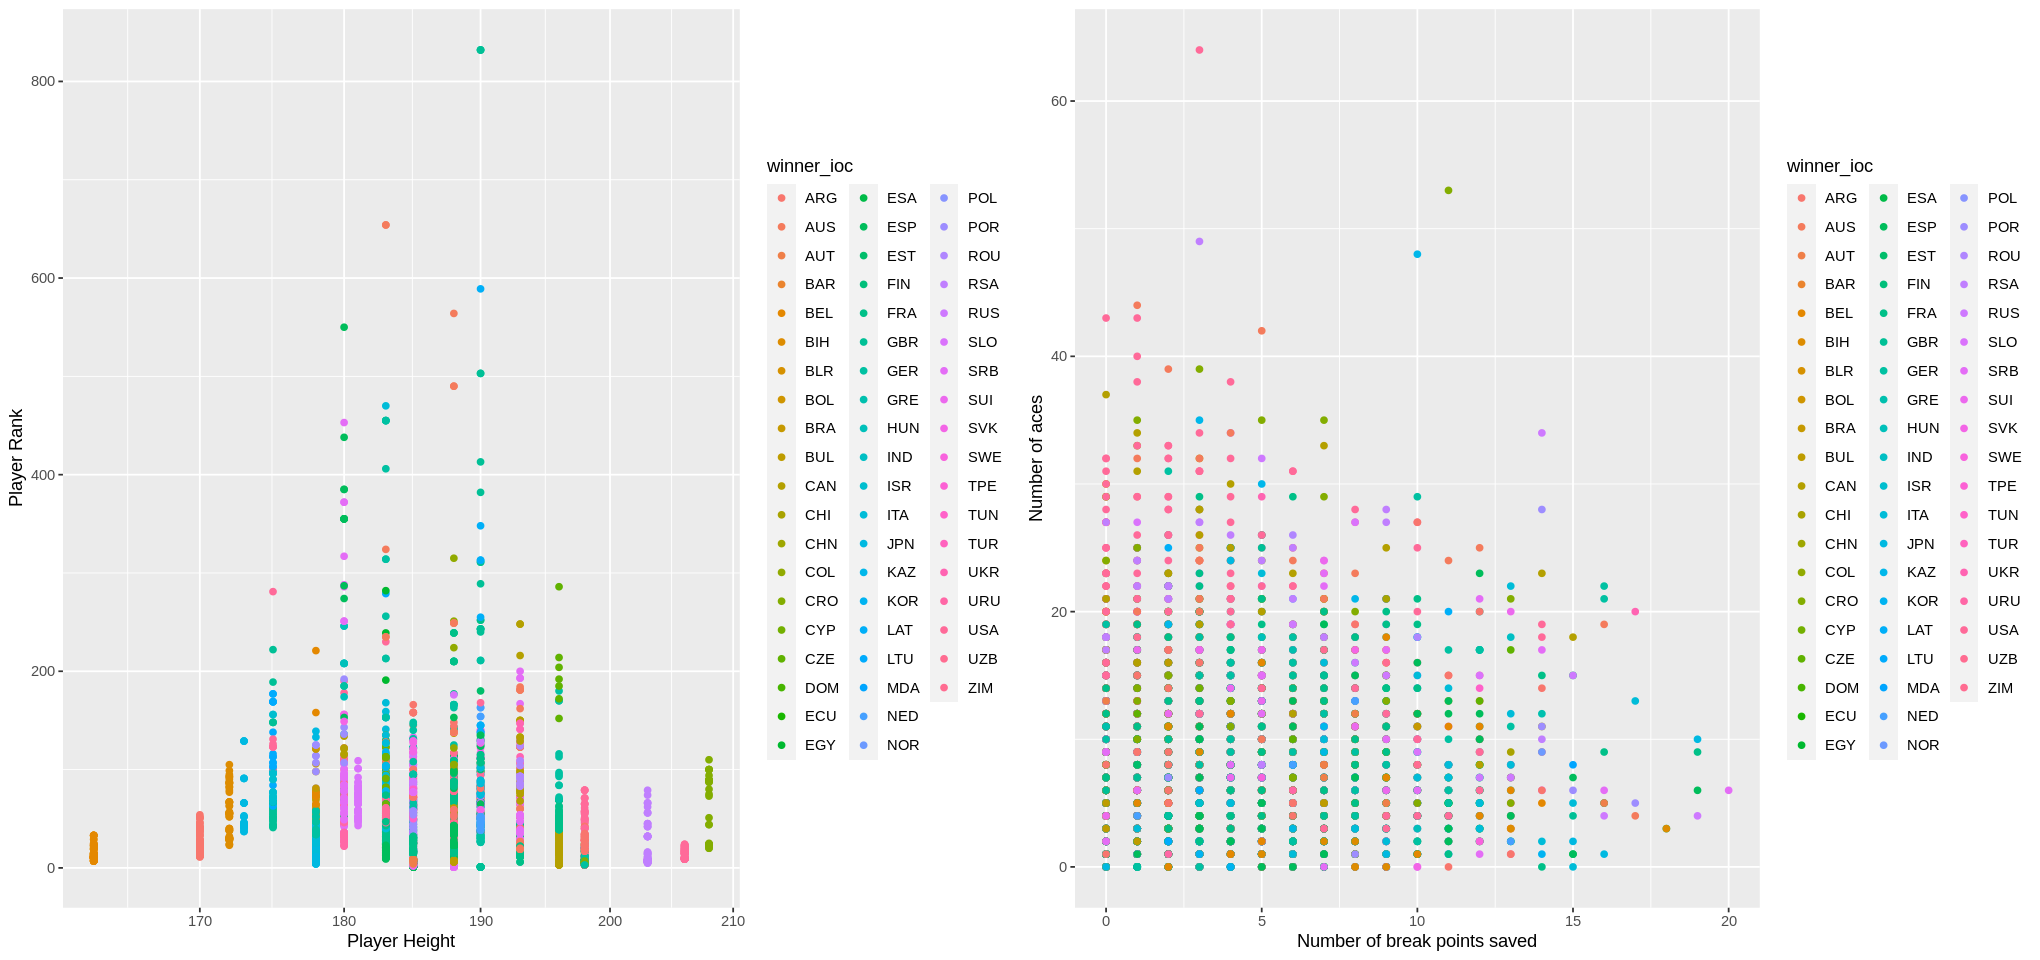

In [2]:
library(tidyverse)
library(cowplot)
library(scales)
library(repr)
library(dplyr)
library(tidyr)

data <- read_csv("atp2017-2019.csv")
data <- select(data, winner_ioc, winner_name, winner_age, winner_hand, winner_ht, w_ace, w_df, winner_rank, w_bpSaved)


first_plot <- data %>% ggplot(aes(x = winner_ht, y = winner_rank)) + 
         geom_point(aes(colour = winner_ioc)) + 
         xlab("Player Height") +
         ylab("Player Rank") +
         scale_x_log10()
options(repr.plot.width = 17, repr.plot.height = 8)

second_plot <- data %>% ggplot(aes(x = w_bpSaved, y = w_ace)) + 
         geom_point(aes(colour = winner_ioc)) + 
         xlab("Number of break points saved") +
         ylab("Number of aces")
plot_grid (first_plot, second_plot)
